In [9]:
import os
import argparse
import numpy as np
import time
import matplotlib.pyplot as pyplot

from main import run_direct_estimation, run_importance_sampling, run_adaptive_importance_sampling, run_multiple_grasps, run_single_grasp

In [10]:
# Define parameters for estimation methods
trial_size_increment = 10
max_trial_exp = 3
gui = False
hill = True
policy_file = './best_hill_climbing_policy.pkl'
depth = 1000
np.random.seed(42)

In [14]:
# Run direct estimation
# stores n, p_failure, std_error, runtime
results_de = {'n':[], 'p_fail':[], 'std_error':[], 'runtime':[]}
for i in range(max_trial_exp):
    start_time = time.time_ns()
    trials = trial_size_increment**(i + 1)
    p_failure_de, std_error_de = run_direct_estimation(
        trials, 
        gui,
        hill,  # Pass hill climbing flag
        policy_file if hill else None  # Pass policy file only if using hill climbing
    )
    end_time = time.time_ns()
    runtime_ns = end_time - start_time
    results_de['n'].append(trials)
    results_de['p_fail'].append(p_failure_de)
    results_de['std_error'].append(std_error_de)
    results_de['runtime'].append(runtime_ns)
    print(f"\nFinal Results:")
    print(f"Failure Probability: {p_failure_de:.4f} ± {std_error_de:.4f}")
    print(f"95% Confidence Interval: [{p_failure_de - 1.96*std_error_de:.4f}, {p_failure_de + 1.96*std_error_de:.4f}]")


Running direct estimation with 10 trials...
Using hill climbing policy
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Starting direct estimation with 10 trials...
Completed 0/10 trials...

Results:
Failure Probability: 0.0000 ± 0.0000
Based on 0 failures in 10 trials
Results saved to results/direct_estimation_results_hill_climbing.csv

Final Results:
Failure Probability: 0.0000 ± 0.0000
95% Confidence Interval: [0.0000, 0.0000]

Running direct estimation with 100 trials...
Using hill climbing policy
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Starting direct estimation with 100 trials...
Completed 0/100 trials...
Completed 50/100 trials...

Results:
Failure Probability: 0.0300 ± 0.0171
Based on 3 failures in 100 trials
Results saved to results/direct_estimation_results_hill_climbing.csv

Final Results:
Failure Probability: 0.0300 ± 0.0171
95% Confidence Interval: [-0.0034, 0.0634]

Running direct estimation with 1000 trials...
Using hill climbing

In [ ]:
# Run importance sampling
# stores n, p_failure, std_error, runtime
results_ims = {'n':[], 'p_fail':[], 'std_error':[], 'runtime':[]}
for i in range(max_trial_exp):
    start_time = time.time_ns()
    trials = trial_size_increment**(i+1)
    failure_prob, std_error = run_importance_sampling(
            n_trials=trials,
            d=depth,
            gui_mode=gui,
            use_hill_climbing=hill,
            policy_file=policy_file if hill else None
        )
    end_time = time.time_ns()
    runtime_ns = end_time - start_time
    results_ims['n'].append(trials)
    results_ims['p_fail'].append(failure_prob)
    results_ims['std_error'].append(std_error)
    results_ims['runtime'].append(runtime_ns)
    print(f"\nFinal Results:")
    print(f"Estimated Failure Probability: {failure_prob:.4f}")
    print(f"95% Confidence Interval: [{failure_prob - 1.96*std_error:.4f}, {failure_prob + 1.96*std_error:.4f}]")


Running importance sampling with 10 trials and depth 1000...
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Running importance sampling with 20 samples...
Estimated failure probability: 0.191669

Final Results:
Estimated Failure Probability: 0.1917
95% Confidence Interval: [0.0551, 0.3283]

Running importance sampling with 100 trials and depth 1000...
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Running importance sampling with 33 samples...
Estimated failure probability: 0.069333

Final Results:
Estimated Failure Probability: 0.0693
95% Confidence Interval: [0.0374, 0.1012]

Running importance sampling with 1000 trials and depth 1000...
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Running importance sampling with 46 samples...
Estimated failure probability: 0.057344

Final Results:
Estimated Failure Probability: 0.0573
95% Confidence Interval: [0.0343, 0.0804]


In [ ]:
# Run adaptive importance sampling
results_aims = {'n':[], 'p_fail':[], 'std_error':[], 'runtime':[]}
for i in range(max_trial_exp):
    start_time = time.time_ns()
    trials = trial_size_increment**(i+1)
    failure_prob, std_error = run_adaptive_importance_sampling(
            n_trials=trials,
            d=depth,
            gui_mode=gui,
            use_hill_climbing=hill,
            policy_file=policy_file if hill else None
        )
    end_time = time.time_ns()
    runtime_ns = end_time - start_time
    results_aims['n'].append(trials)
    results_aims['p_fail'].append(failure_prob)
    results_aims['std_error'].append(std_error)
    results_aims['runtime'].append(runtime_ns)
    print(f"\nFinal Results:")
    print(f"Estimated Failure Probability: {failure_prob:.4f}")
    print(f"95% Confidence Interval: [{failure_prob - 1.96*std_error:.4f}, {failure_prob + 1.96*std_error:.4f}]")


Running adaptive importance sampling with 10 trials and depth 1000...
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Completed 0/10 iterations...
Estimated failure probability: 0.278571

Final Results:
Estimated Failure Probability: 0.2786
95% Confidence Interval: [-0.2096, 0.7667]

Running adaptive importance sampling with 100 trials and depth 1000...
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Completed 0/10 iterations...
Estimated failure probability: 0.092959

Final Results:
Estimated Failure Probability: 0.0930
95% Confidence Interval: [-0.2621, 0.4480]

Running adaptive importance sampling with 1000 trials and depth 1000...
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Completed 0/10 iterations...
Estimated failure probability: 0.099893

Final Results:
Estimated Failure Probability: 0.0999
95% Confidence Interval: [-0.3666, 0.5664]


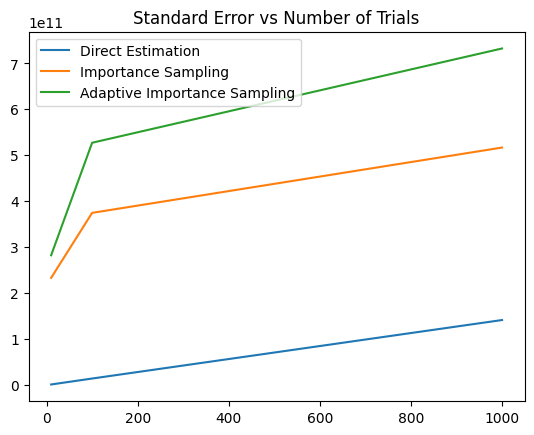

In [16]:
# failure probability graph
pyplot.plot(results_de['n'], results_de['runtime'])
pyplot.plot(results_ims['n'], results_ims['runtime'])
pyplot.plot(results_aims['n'], results_aims['runtime'])
pyplot.legend(["Direct Estimation", "Importance Sampling", "Adaptive Importance Sampling"])
pyplot.title("Standard Error vs Number of Trials")
pyplot.show()